In [272]:
#Exploratory Data Analysis
#Univariate Analysis
#Bivariate Analysis
#Missing Value Treatment
#Feature Engineering
#Encoding Categorical Variables - Label Encoding - One Hot Encoding
#Modeling - Linear Regression - Lasso Regression - Ridge Regression - RandomForest - XGBoost

In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
import gc
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 
import warnings 
warnings.filterwarnings('ignore')

In [274]:
df=pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')
df2=df.append(df1)
df.shape, df1.shape

((8523, 12), (5681, 11))

In [275]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


#### Univariate Analysis 

In [277]:
df2.describe(include="all")

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
count,14204,14204,14204.000000,8523.000000,14204,14204.000000,11765.000000,14204.000000,14204,14204,10188,14204
unique,5,1559,NaN,NaN,16,NaN,NaN,NaN,10,3,3,4
top,Low Fat,NCX06,NaN,NaN,Fruits and Vegetables,NaN,NaN,NaN,OUT027,Tier 3,Medium,Supermarket Type1
freq,8485,10,NaN,NaN,2013,NaN,NaN,NaN,1559,5583,4655,9294
mean,NaN,NaN,141.004977,2181.288914,NaN,0.065953,12.792854,1997.830681,NaN,NaN,NaN,NaN
std,NaN,NaN,62.086938,1706.499616,NaN,0.051459,4.652502,8.371664,NaN,NaN,NaN,NaN
min,NaN,NaN,31.290000,33.290000,NaN,0.000000,4.555000,1985.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,94.012000,834.247400,NaN,0.027036,8.710000,1987.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,142.247000,1794.331000,NaN,0.054021,12.600000,1999.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,185.855600,3101.296400,NaN,0.094037,16.750000,2004.000000,NaN,NaN,NaN,NaN


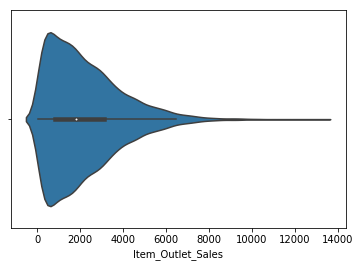

In [278]:
sns.violinplot(df.Item_Outlet_Sales)

In [279]:
df['log_sales']=np.log(df.Item_Outlet_Sales)

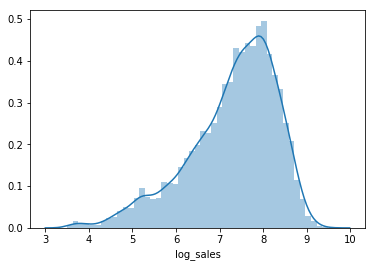

In [280]:
sns.distplot(df['log_sales'])

In [281]:
df['log_sales'].skew(),df['log_sales'].kurtosis()

(-0.887753343209305, 0.55205473336735)

In [282]:
df.Item_Identifier.nunique() , df1.Item_Identifier.nunique(), 

(1559, 1543)

In [283]:
len(set(df1.Item_Identifier.values.tolist()) - set(df.Item_Identifier.values.tolist()))

0

In [284]:
df1[df1['Item_Identifier']=='FDA15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1115,FDA15,9.3,Low Fat,0.016022,Dairy,249.9092,OUT046,1997,Small,Tier 1,Supermarket Type1


In [285]:
df[df['Item_Identifier']=='FDA15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,log_sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,8.225540
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,8.695544
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,8.775586
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,8.695544
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,6.210637
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392,8.775586
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392,8.775586
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208,8.695544


In [286]:
df.Outlet_Identifier.nunique() , df1.Outlet_Identifier.nunique()

(10, 10)

In [287]:
len(set(df1.Outlet_Identifier.values.tolist()) - set(df.Outlet_Identifier.values.tolist()))

0

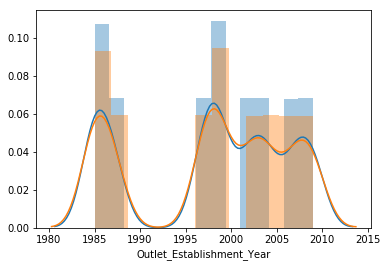

In [288]:
sns.distplot(df['Outlet_Establishment_Year'])
sns.distplot(df1['Outlet_Establishment_Year'])

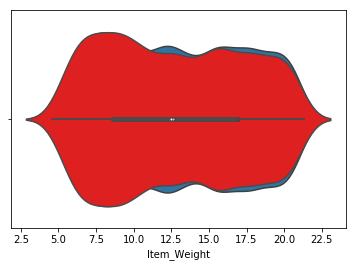

In [289]:
sns.violinplot(df.Item_Weight)
sns.violinplot(df1.Item_Weight,color='red')

In [290]:
df2['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

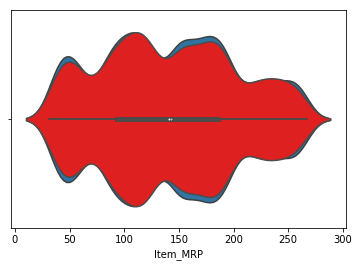

In [291]:
sns.violinplot(df.Item_MRP)
sns.violinplot(df1.Item_MRP,color='red')

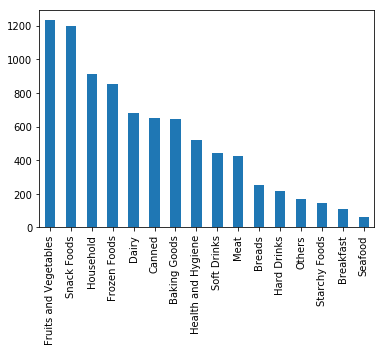

In [292]:
df.Item_Type.value_counts().plot(kind='bar')

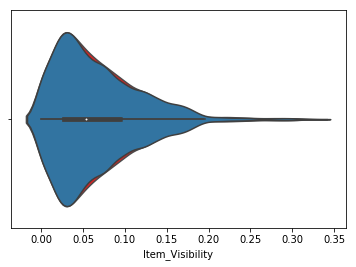

In [293]:
sns.violinplot(df1.Item_Visibility,color='red')
sns.violinplot(df.Item_Visibility)

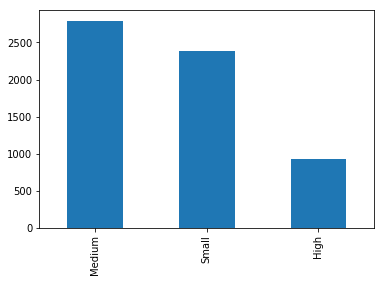

In [294]:
df.Outlet_Size.value_counts().plot(kind='bar')

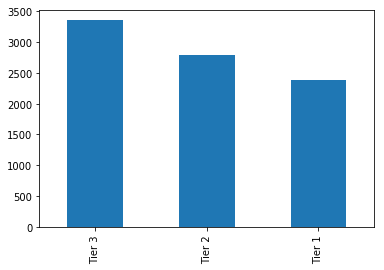

In [295]:
df.Outlet_Location_Type.value_counts().plot(kind='bar')

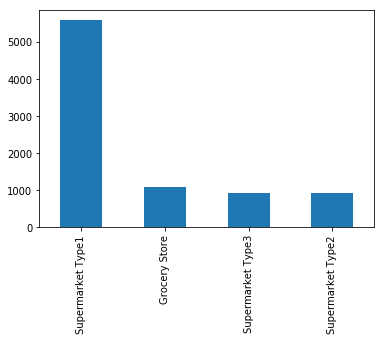

In [296]:
df.Outlet_Type.value_counts().plot(kind='bar')

In [297]:
df2.Outlet_Type=df2.Outlet_Type.astype('category')

#### Multivariate Analysis

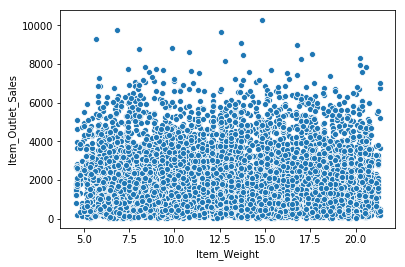

In [298]:
sns.scatterplot(df.Item_Weight,df.Item_Outlet_Sales)

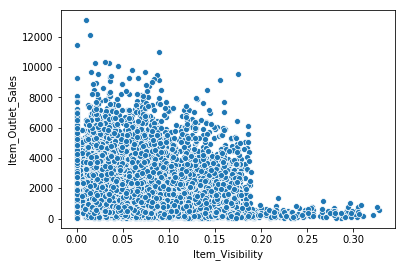

In [299]:
sns.scatterplot(df.Item_Visibility,df.Item_Outlet_Sales)

In [300]:
le = preprocessing.LabelEncoder()
df['Item_Identifier']=le.fit_transform(df['Item_Identifier'])
df1['Item_Identifier']=le.transform(df1['Item_Identifier'])

In [301]:
obj_col=df.select_dtypes(include='object')

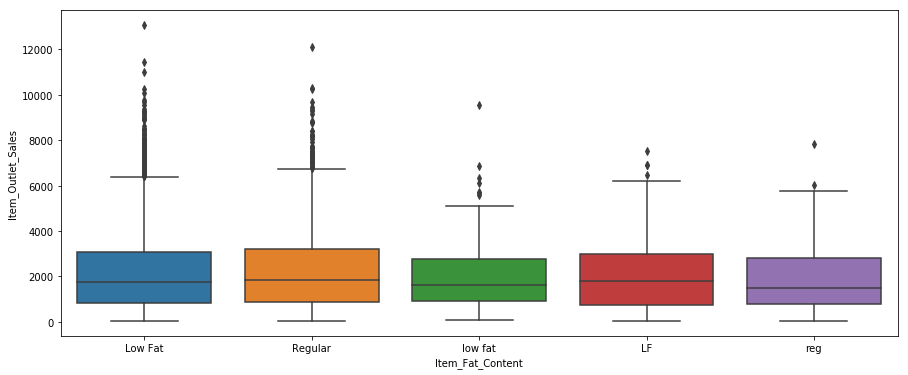

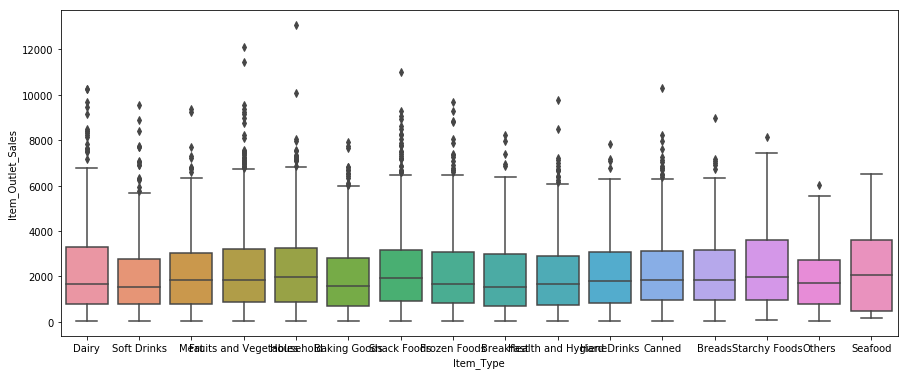

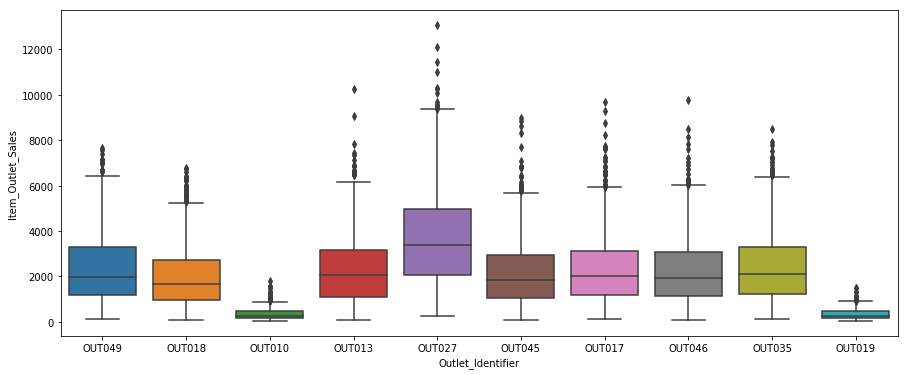

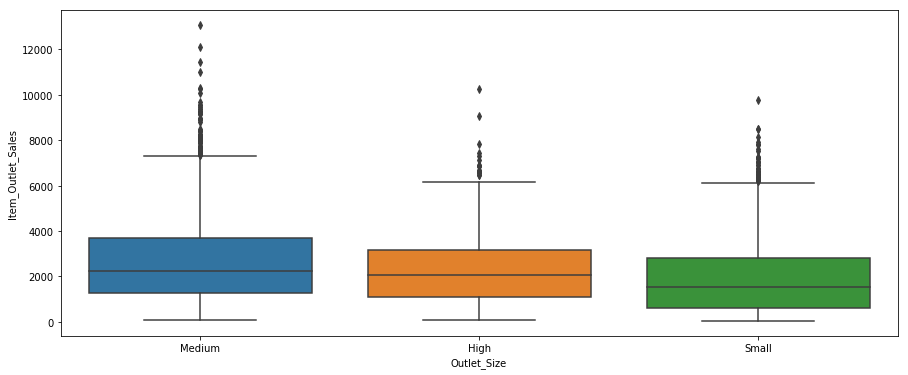

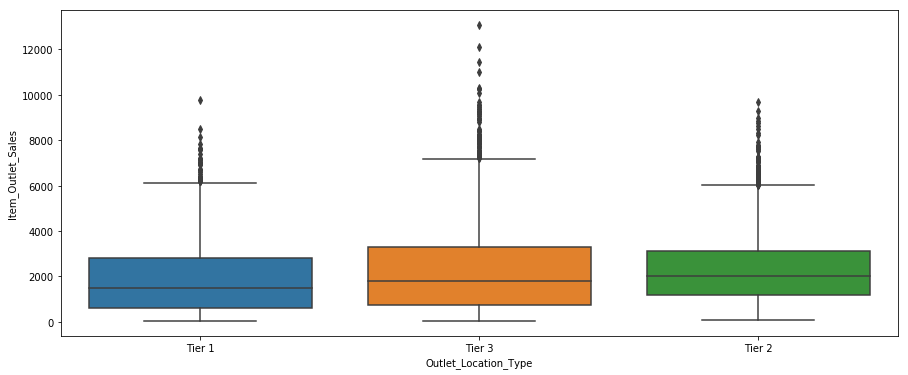

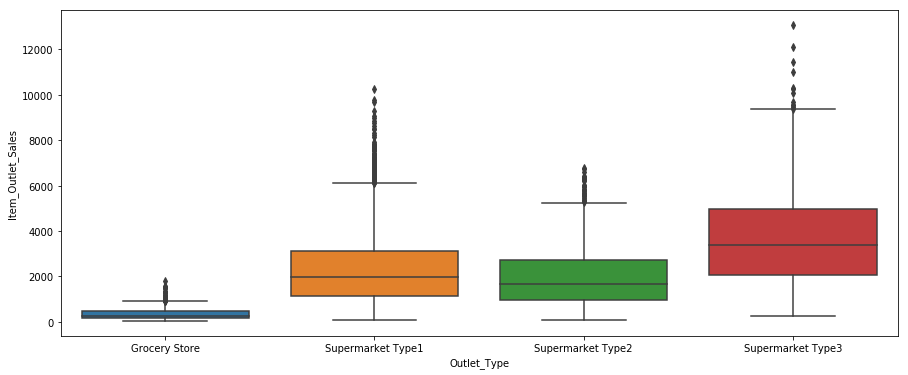

In [302]:
for i in obj_col:
    plt.subplots(figsize=(15,6))
    sns.boxplot(df2[i],df2['Item_Outlet_Sales'])

#### Data Cleansing 

In [303]:
dict1 = {'Low Fat' : 0, 'LF' : 0, 'low fat' : 0, 'Regular' : 1 , 'reg' : 1}
df2.Item_Fat_Content = df2.Item_Fat_Content.map(dict1)

In [304]:
dict2={'Small':1,'Medium':2,'High':3}
df2['Outlet_Size']=df2.Outlet_Size.map(dict2)

In [305]:
dict3={'Tier 1':1,'Tier 2':2,'Tier 3':3}
df2.Outlet_Location_Type=df2.Outlet_Location_Type.map(dict3).astype('category')

In [306]:
dict4={'Grocery Store':1,'Supermarket Type1':2,'Supermarket Type2':3,'Supermarket Type3' : 4}
df2.Outlet_Type=df2.Outlet_Type.map(dict4).astype('category')

#### Imputing Missing Values

In [307]:
df2.isna().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [308]:
df2.groupby('Outlet_Identifier').Outlet_Size.mean()

Outlet_Identifier
OUT010    NaN
OUT013    3.0
OUT017    NaN
OUT018    2.0
OUT019    1.0
OUT027    2.0
OUT035    1.0
OUT045    NaN
OUT046    1.0
OUT049    2.0
Name: Outlet_Size, dtype: float64

In [309]:
df2[df2['Outlet_Identifier']=='OUT010'][['Outlet_Location_Type','Outlet_Type']].drop_duplicates()

,Outlet_Location_Type,Outlet_Type
3,3,1


In [310]:
df2.groupby('Outlet_Location_Type').agg({'Outlet_Size':'mean'}).reset_index()

,Outlet_Location_Type,Outlet_Size
0,1,1.389447
1,2,1.000000
2,3,2.333405


In [311]:
df2.groupby('Outlet_Type').agg({'Outlet_Size':'mean'}).reset_index()

,Outlet_Type,Outlet_Size
0,1,1.000000
1,2,1.750605
2,3,2.000000
3,4,2.000000


In [312]:
df2[df2['Outlet_Identifier']=='OUT010']['Outlet_Size'] = 2
df2[df2['Outlet_Identifier']=='OUT017']['Outlet_Size'] = 1
df2[df2['Outlet_Identifier']=='OUT045']['Outlet_Size'] = 1

In [313]:
item_weight=df2[~df2['Item_Weight'].isna()].groupby('Item_Identifier').Item_Weight.mean().reset_index().rename(columns={'Item_Weight' : 'new_Item_Weight'})

In [314]:
df2=pd.merge(df2,item_weight,on='Item_Identifier',how='left')

In [316]:
df2=df2.drop('Item_Weight',1)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,new_Item_Weight
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,1,2.0,2,9.30
1,1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,3,2.0,3,5.92
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,1,2.0,2,17.50
3,1,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,3,NaN,1,19.20
4,0,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,3,3.0,2,8.93


#### Base Model

#### Feature Engineering 

In [79]:
df2['Item_Type_Combined'] = df2['Item_Identifier'].apply(lambda x: x[0:2])
df2['Item_Type_Combined'] = df2['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})